![head.png](https://github.com/iwh-halle/FinancialDataAnalytics/blob/master/figures/head.jpg?raw=1)

# Financial Data Analytics in Python

**Prof. Dr. Fabian Woebbeking**</br>
Assistant Professor of Financial Economics

IWH - Leibniz Institute for Economic Research</br>
MLU - Martin Luther University Halle-Wittenberg

fabian.woebbeking@iwh-halle.de

# Homework: Natural Language Processing (NLP)

You will need a Git/GitHub repository to submit your course deliverables. Consult [**slides.ipynb**](https://github.com/iwh-halle/FinancialDataAnalytics) for help with the tasks below! If you need further assistance, do not hesitate to open a Q&A at https://github.com/iwh-halle/FinancialDataAnalytics/discussions

### Task: Sourcing

The first stage involves sourcing and reading the textual content of scientific papers. You find an example pdf file in ``../lit/nonanswers.pdf``. Please [download](https://scholar.google.de/) and analyze at least one additional paper of your choice (make sure to commit the paper to your repository).

Use an appropriate PDF reading library or tool to programmatically extract the text. You can find an example below, however, you are free to use any Python library you like.

In [8]:
# Step 1: Install pdfminer.six if you haven't already
# You can install it using conda or pip, see 
  # https://anaconda.org/conda-forge/pdfminer.six
  # https://pypi.org/project/pdfminer.six/

# Step 2: Import the required module
from pdfminer.high_level import extract_text

# Step 3: Extract text from PDF file
extracted_text = extract_text('../lit/nonanswers.pdf')
print(extracted_text[0:80])

“Let me get back to you” –
A machine learning approach to measuring
non-answers



In [18]:
from pdfminer.high_level import extract_text

extracted_text = extract_text('../Redmon_You_Only_Look_CVPR_2016_paper.pdf')
print(extracted_text[0:80])

You Only Look Once:
Uniﬁed, Real-Time Object Detection

Joseph Redmon∗, Santosh 


### Task: Pre-processing

Pre-processing is a critical step aimed at cleaning and preparing the text data for analysis. Steps that you should consider:

* Removing punctuation, numbers and special characters using regular expressions.
* Converting all the text to a uniform case (usually lower case) to ensure that the analysis is not case-sensitive.
* Stop word removal, i.e. eliminating commonly used words (e.g., 'and', 'the', 'is') that do not contribute significantly to the overall meaning and can skew the analysis.
* Other potential pre-processing steps might include stemming and lemmatization, depending on the specific requirements and goals of the analysis. (optional)

In [14]:
#Libraries
import requests
from bs4 import BeautifulSoup
import collections
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re
import nltk
import numpy as np
import pandas as pd
import configparser
import openai

# Update package stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/codespace/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [22]:
processed_text = re.sub('[^a-zA-ZäöüÄÖÜß-]', ' ', extracted_text)
# Convert all characters to lowercase 
processed_text = processed_text.lower()
# Split the text into individual words (you could also use 'nltk.tokenize.word_tokenize' or lemming/stemming)
processed_text = processed_text.split()

#Removing stop words
stop_words = set(nltk.corpus.stopwords.words('english'))
processed_text = [word for word in processed_text if word not in stop_words]
print(processed_text)

['look', 'uni', 'ed', 'real-time', 'object', 'detection', 'joseph', 'redmon', 'santosh', 'divvala', 'ross', 'girshick', 'ali', 'farhadi', 'university', 'washington', 'allen', 'institute', 'ai', 'facebook', 'ai', 'research', 'http', 'pjreddie', 'com', 'yolo', 'abstract', 'present', 'yolo', 'new', 'approach', 'object', 'detection', 'prior', 'work', 'object', 'detection', 'repurposes', 'classi', 'ers', 'per-', 'form', 'detection', 'instead', 'frame', 'object', 'detection', 're-', 'gression', 'problem', 'spatially', 'separated', 'bounding', 'boxes', 'associated', 'class', 'probabilities', 'single', 'neural', 'network', 'pre-', 'dicts', 'bounding', 'boxes', 'class', 'probabilities', 'directly', 'full', 'images', 'one', 'evaluation', 'since', 'whole', 'detection', 'pipeline', 'single', 'network', 'optimized', 'end-to-end', 'directly', 'detection', 'performance', 'uni', 'ed', 'architecture', 'extremely', 'fast', 'base', 'yolo', 'model', 'processes', 'images', 'real-time', 'frames', 'per', 'se

### Task: Analysis

The final stage is the analysis of the pre-processed text, in order to extract meaningful context. This may involve:

* Frequency Analysis: Determining the most commonly occurring words or phrases, which can provide initial insights into the primary focus areas of the papers. Consider, e.g. a word cloud as a visualization.
* Contextual Analysis: Using more advanced NLP techniques such as Word Embedding or Topic Modeling to understand the context of the papers.
* Sentiment analysis: We would expect that scientific papers are written in a neutral tone, can you confirm this?
* Summarization: Employing algorithms to generate concise summaries of the papers, capturing the key points and findings.

Pick any method that you like (you are allowed to use ChatGPT's API as well).

Counter({'yolo': 101, 'detection': 84, 'r-cnn': 70, 'object': 67, 'fast': 59, 'x': 50, 'bounding': 41, 'boxes': 40, 'network': 37, 'box': 37, 'image': 35, 'model': 32, 'real-time': 30, 'objects': 28, 'voc': 27, 'convolutional': 25, 'dpm': 24, 'computer': 24, 'also': 23, 'layers': 23, 'grid': 22, 'vision': 22, 'classi': 21, 'system': 21, 'j': 21, 'class': 20, 'cell': 19, 'performance': 17, 'map': 17, 'use': 17, 'predict': 16, 'detections': 16, 'con': 16, 'b': 16, 'error': 16, 'pages': 16, 'neural': 15, 'systems': 15, 'accurate': 15, 'c': 15, 'r': 15, 'ieee': 15, 'single': 14, 'images': 14, 'test': 14, 'models': 14, 'dence': 14, 'predicts': 14, 'arxiv': 14, 'one': 13, 'since': 13, 'still': 13, 'like': 13, 'time': 13, 'training': 13, 'small': 13, 'layer': 13, 'iou': 12, 'pascal': 12, 'probabilities': 11, 'background': 11, 'figure': 11, 'using': 11, 'features': 11, 'prediction': 11, '-': 11, 'p': 11, 'data': 11, 'faster': 11, 'per': 10, 'errors': 10, 'less': 10, 'methods': 10, 'artwork': 1

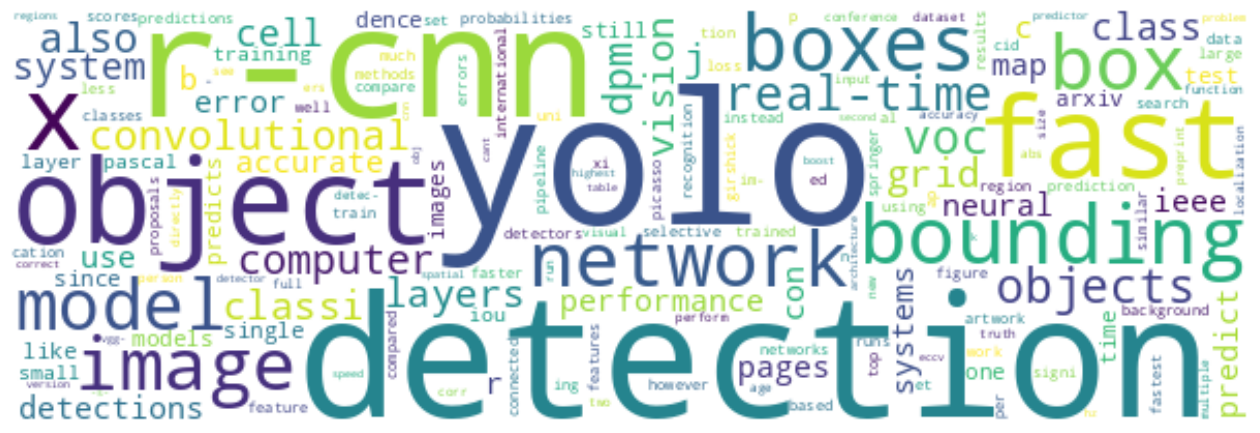

In [23]:
# Frequency Analysis
word_frequency = collections.Counter(processed_text)
print(word_frequency)

wc = WordCloud(width=600, height=200, max_words=200, background_color='white').generate_from_frequencies(word_frequency)
plt.figure(figsize=(16,12))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [25]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

# Download VADER lexicon if not already downloaded
nltk.download('vader_lexicon')

def analyze_sentiment(article_text):
    sia = SentimentIntensityAnalyzer()
    sentiment = sia.polarity_scores(article_text)
    return sentiment


# Positive text
positive_text = "The product is wonderful and the service has been outstanding."
print(f"Positive text polarity: {analyze_sentiment(positive_text)}")

# Negative text
negative_text = "The firm reported a disappointing quarter, with revenues falling short of expectations."
print(f"Negative text polarity: {analyze_sentiment(negative_text)}")

# Neutral text
neutral_text = "The Federal Reserve announced a new interest rate of 0.75%."
print(f"Neutral text polarity: {analyze_sentiment(neutral_text)}")

# Sentiment used in MLU news (note that a mixture of German and English could be a problem here)
print(f"Research Paper Sentiment: {analyze_sentiment(' '.join(processed_text))}")

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/codespace/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Positive text polarity: {'neg': 0.0, 'neu': 0.51, 'pos': 0.49, 'compound': 0.8271}
Negative text polarity: {'neg': 0.348, 'neu': 0.652, 'pos': 0.0, 'compound': -0.5859}
Neutral text polarity: {'neg': 0.0, 'neu': 0.727, 'pos': 0.273, 'compound': 0.4588}
Research Paper Sentiment: {'neg': 0.042, 'neu': 0.824, 'pos': 0.134, 'compound': 0.9998}
